In [1]:
%pylab inline
import mdtraj as md
import pandas as pd
rc('font', family='serif', size=20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
temps = ('300','373','423','473','523','573','623')
print len(temps)

7


In [3]:
h_u_top = md.load('/home/gerry/heat/structures/H-unbound.pdb')
h_l_top = md.load('/home/gerry/heat/structures/H-bound.pdb')

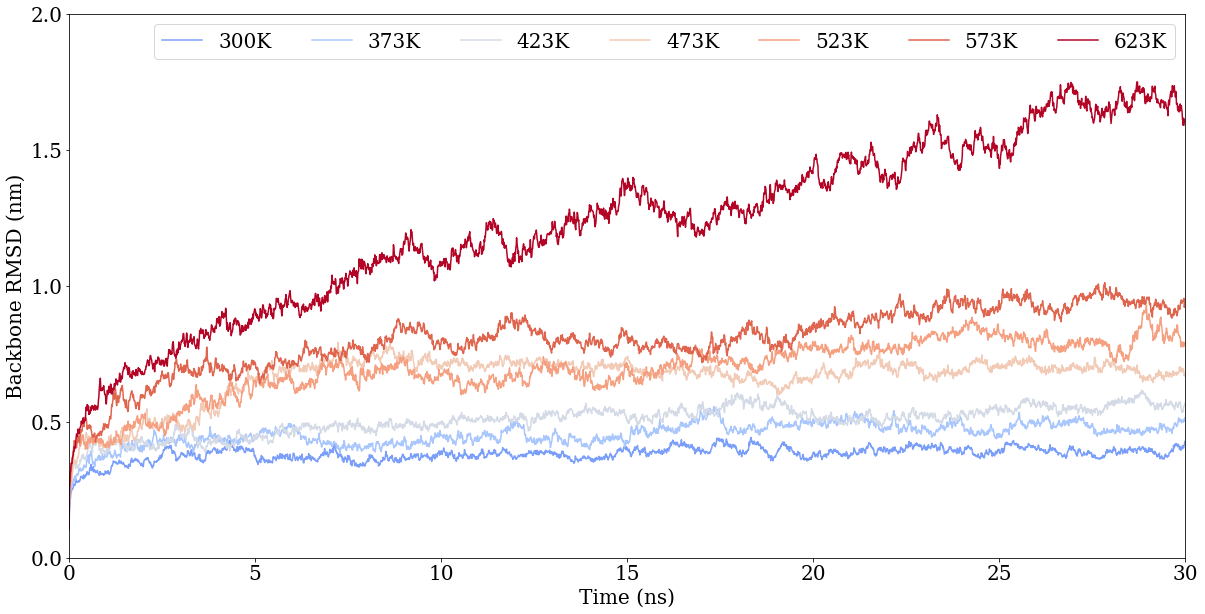

In [10]:
h_unbound_to_u = pd.DataFrame()
rmsd_list = pd.DataFrame()

figure(figsize=(20,10))
colors = iter(cm.coolwarm(np.linspace(0.2, 1, len(temps))))
for t in temps:
    c = next(colors)
    traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
    rmsd = md.rmsd(traj, h_u_top)
    h_unbound_to_u = h_unbound_to_u.append(pd.Series(rmsd), ignore_index=True)
    
    traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
    rmsd1 = md.rmsd(traj, h_u_top)
    h_unbound_to_u = h_unbound_to_u.append(pd.Series(rmsd1), ignore_index=True)
    rmsd = (rmsd+rmsd1)/2

    traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
    rmsd2 = md.rmsd(traj, h_u_top)
    h_unbound_to_u = h_unbound_to_u.append(pd.Series(rmsd2), ignore_index=True)
    rmsd = (rmsd+rmsd2)/2
    
    rmsd_list = rmsd_list.append(pd.Series(rmsd), ignore_index=True)
    plot(rmsd, color=c, label=t+'K')

legend(ncol=len(temps))
xlim(0,3000)
xticks(range(0,3001,500),range(0,31,5))
xlabel('Time (ns)')
yticks(arange(0,2.1,0.5))
ylim(0,2)
ylabel('Backbone RMSD (nm)')

h_unbound_to_u.to_csv('h_unbound_to_u.csv', index=False)
savefig('fig_src/rmsd.png', format='png', dpi=600, bbox_inches="tight")

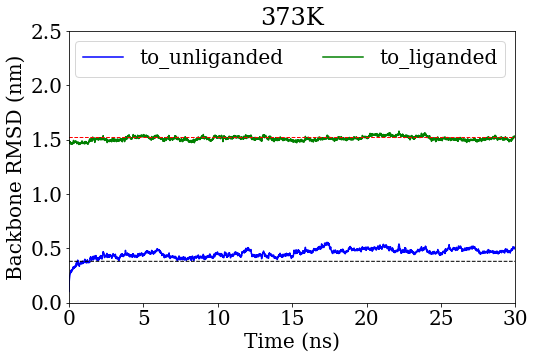

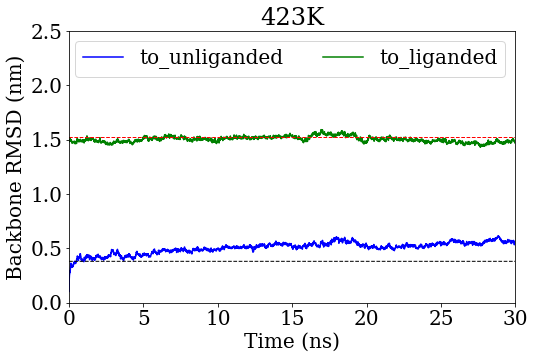

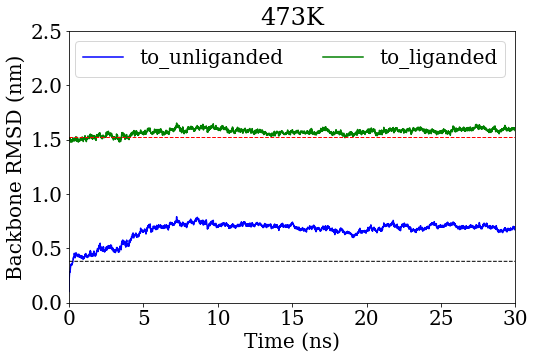

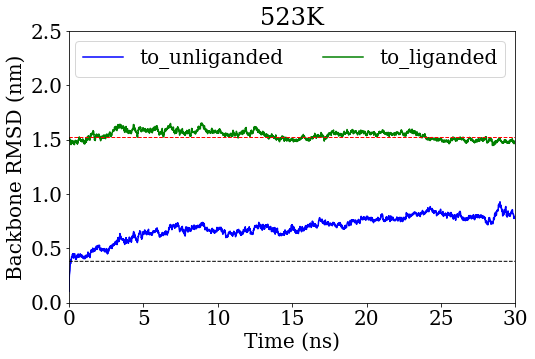

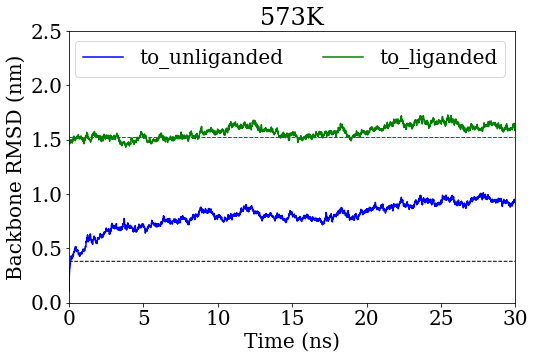

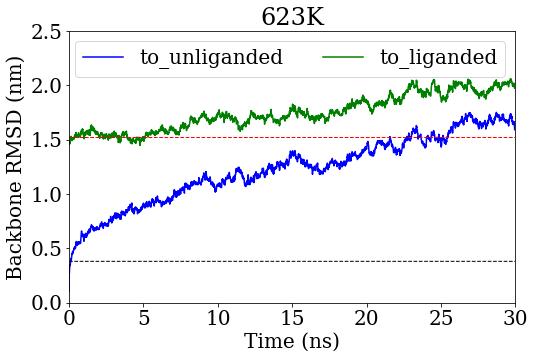

In [9]:
x = np.arange(0,3001)

mean_un = 0
mean_li = 0

for i,t in enumerate(temps):
    if t == '300':        
        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
        rmsd = md.rmsd(traj, h_l_top)
        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_l_top)      
        rmsd = (rmsd+rmsd1)/2

        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_l_top)       
        rmsd = (rmsd+rmsd2)/2
        
        mean_un = mean(rmsd_list.iloc[i])
        mean_li = mean(rmsd)
        
    else:        
        figure(figsize=(8,5))
        plot(rmsd_list.iloc[i], 'b', label='to_unliganded')

        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
        rmsd = md.rmsd(traj, h_l_top)
        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_l_top)      
        rmsd = (rmsd+rmsd1)/2

        traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_l_top)       
        rmsd = (rmsd+rmsd2)/2
        plot(rmsd, color='g', label='to_liganded')
        
        x = range(0,rmsd.shape[0])
        plot(x, [mean_un for i in x], color='k', linestyle='--', linewidth=1)
        plot(x, [mean_li for i in x], color='r', linestyle='--', linewidth=1)

        legend(ncol=2)
        title(t+'K')
        xlim(0,3000)
        xticks(range(0,3001,500),range(0,31,5))
        xlabel('Time (ns)')
        yticks(arange(0,2.6,0.5))
        ylim(0,2.5)
        ylabel('Backbone RMSD (nm)')

        savefig('fig_src/rmsd_u_l_'+t+'.png', format='png', dpi=600, bbox_inches="tight")